In [11]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import sys

sys.path.append(os.path.join(os.getenv("HOME"), "gpuaffman_networks/"))
import general_network, binary_core, general_network_visualization

In [12]:
N = 100
k = 3
n_timesteps = 100

In [13]:
init_state = binary_core.random_binary_data((N), 0.5)
functions = binary_core.random_binary_data((N, 1<<k), 0.5)
connections = np.random.randint(0, N, (N, k))

In [14]:
all_states = np.moveaxis(np.tile(np.expand_dims(init_state, -1), n_timesteps + 1), -1, 0)
for timestep in range(n_timesteps):
    all_states[timestep+1, ...] = general_network.state_update(all_states[timestep, ...], functions, connections)

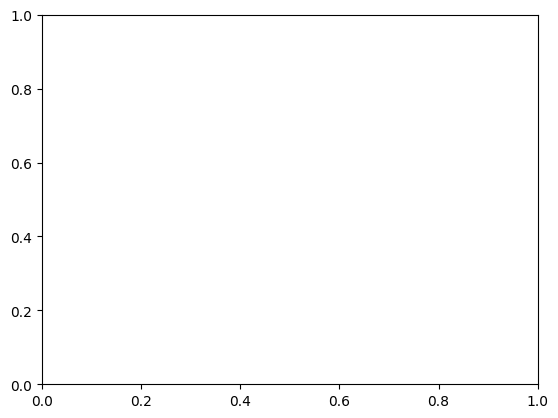

In [17]:
fig, axs = plt.subplots()
graph = general_network_visualization.graph_from_spec(connections)
layout = nx.spring_layout(graph, iterations=100)

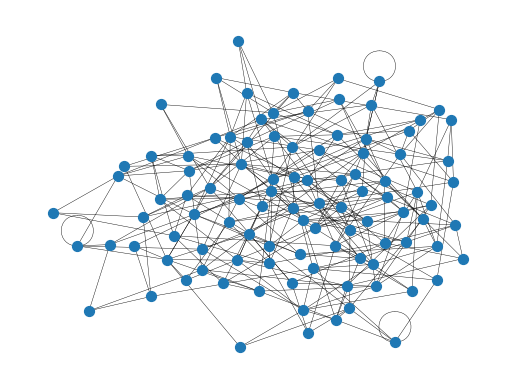

In [18]:
fig_l, axs_l = plt.subplots()
node_size = 50
edge_width = 0.3
nx.draw(graph, pos=layout, ax=axs_l, node_size=node_size, width=edge_width)

In [19]:
animation = general_network_visualization.graph_animation(graph, layout, all_states, fig, axs, node_size=node_size)

In [20]:
animation.save('test.mp4')

In [62]:
HTML(animation.to_html5_video())
